#***FINAL PROJECT***

***Airplane Crashes Since 1908***

The main aim of this project is to analyse Airplane carashes data and visualy present it.

The first step of this project is to load data.Data is in different files thus we will need to merge to get the final dataset to work with.


***DATASETS***

The first dataset is from a local machine which is in json format.


https://www.kaggle.com/code/franciscoescobar/the-statistics-of-airplane-accidents/data?select=Airplane_Crashes_and_Fatalities_Since_1908.csv

In [1]:
# first dataset file path
location_path = './Airplane_Crashes_and_Fatalities_Since_1908_Location.json'

The other sources are downloaded from the internet. The below cell has two paths for the other datasets.

In [2]:
airplane_path = 'https://raw.githubusercontent.com/Mbicha/data_science/main/data/Airplane_Crashes_and_Fatalities_Since_1908.csv'
operator_path = 'https://raw.githubusercontent.com/Mbicha/data_science/main/data/Airplane_Crashes_and_Fatalities_Since_1908_operator.csv'

Since we have all path for our datasets, it is time to read the datasets using pandas and convert to dataframe.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def read_csv_json_to_dataframe(data1, data2, data3):
    
    """
    Parameters:
    ==========
    data1: json
        This is a json file
    data2: csv
        This is a csv file
    data3: csv
        This is a csv file
    =========
    Return
    =========
    3 dataframes
    """
    return pd.read_json(data1),  pd.read_csv(data2), pd.read_csv(data3)

In [5]:
location_df, airplane_df, operator_df = read_csv_json_to_dataframe(location_path, airplane_path, operator_path)

Since we have all path for our datasets, it is time to read the datasets using pandas and convert to dataframe.

In [6]:
location_df.columns

Index(['id', 'Location'], dtype='object')

In [7]:
airplane_df.columns

Index(['id', 'Date', 'Time', 'Flight #', 'Route', 'Type', 'Registration',
       'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary', 'Unnamed: 12'],
      dtype='object')

In [8]:
operator_df.columns

Index(['id', 'Operator'], dtype='object')

From the 3 datasets columns, we deduce that id is common among the datasets.

Now it is time to merge the dataframes. In ours case the datasets should be combined horizontally.

For this we will create new function which will merge 3 dataframes.

In [9]:
def merge_three_dataframes():
    
    """Merge 3 dataframes"""
    merged_dataframe = airplane_df.merge(location_df, how='left', on='id')
    
    return merged_dataframe.merge(operator_df, how='left', on='id')

In [10]:
airplane_fatalities_df = merge_three_dataframes()

In [11]:
airplane_fatalities_df.head(3)

,id,Date,Time,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Unnamed: 12,Location,Operator
0,1,09/17/1908,17:18,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",NaN,"Fort Myer, Virginia",Military - U.S. Army
1,2,07/12/1912,06:30,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,NaN,"AtlantiCity, New Jersey",Military - U.S. Navy
2,3,08/06/1913,NaN,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,NaN,"Victoria, British Columbia, Canada",Private


**Missing Values**

After showing a few rows, we observe that there are missing values.

Let's visualize in heatmap to see how many missing values and the ones we can drop.

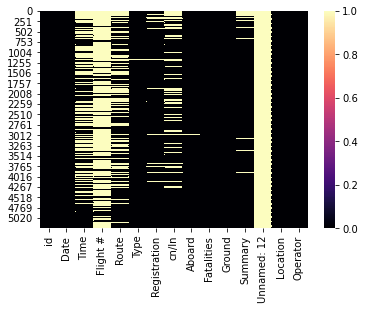

In [12]:
sns.heatmap(data=airplane_fatalities_df.isna(), cmap='magma')

From the heatmap above we can drop the following columns 'Time', 'Flight #', 'Route', 'Registration','cn/In', 'Summary', 'Unnamed: 12'

For this I am going to create function that accepts dataframe, list as a parameter, then drop the these columns from this dataframe.

Since we know both dataframe and columns, we can initialize them in the parameters.

In [13]:
columns = ['Time', 'Flight #', 'Route', 'Registration','cn/In', 'Summary', 'Unnamed: 12']
def remove_list_of_columns(df=airplane_fatalities_df, list_cols_to_remove=columns):
    
    """
    Parameters
    ==========
    df: Dataframe
        Dataframe from which the columns are dropped
    list_cols_to_remove: List
        This has a list of columns to be dropped
    =========
    Return
    ---------
    Dataframe without list_cols_to_remove
    """
    
    return df.drop(list_cols_to_remove, axis=1)

In [14]:
airplane_fatalities_df = remove_list_of_columns()
airplane_fatalities_df.head(3)

,id,Date,Type,Aboard,Fatalities,Ground,Location,Operator
0,1,09/17/1908,Wright Flyer III,2.0,1.0,0.0,"Fort Myer, Virginia",Military - U.S. Army
1,2,07/12/1912,Dirigible,5.0,5.0,0.0,"AtlantiCity, New Jersey",Military - U.S. Navy
2,3,08/06/1913,Curtiss seaplane,1.0,1.0,0.0,"Victoria, British Columbia, Canada",Private


Let's see if we have any missing values remaining.

In [15]:
airplane_fatalities_df.isna().sum()

id             0
Date           0
Type          27
Aboard        22
Fatalities    12
Ground        22
Location       0
Operator      18
dtype: int64

Let's fill missing values with mode for all columns

In [16]:
def fix_missing_values(df, col):
    
    """
    Parameters
    ==========
    df: Dataframe
        Dataframe with missing values
    col:
        column with missing values to be filled
    ==========
    Return
    ----------
    Dataframe with column whose dataframe has no missing values
    """
    
    df[col] = df[col].fillna(df[col].mode()[0])
    return df

In [17]:
cleaned_df = fix_missing_values(airplane_fatalities_df, 'Type')
cleaned_df = fix_missing_values(airplane_fatalities_df, 'Aboard')
cleaned_df = fix_missing_values(airplane_fatalities_df, 'Fatalities')
cleaned_df = fix_missing_values(airplane_fatalities_df, 'Ground')
cleaned_df = fix_missing_values(airplane_fatalities_df, 'Aboard')
cleaned_df = fix_missing_values(airplane_fatalities_df, 'Operator')

In [18]:
cleaned_df.isna().sum()

id            0
Date          0
Type          0
Aboard        0
Fatalities    0
Ground        0
Location      0
Operator      0
dtype: int64

Let's fill missing values with mode for all columns

***Add Features***

Add column Years. This will be necessary when analyzing fatalities as per the year they occured.

In [19]:
def add_year(df, date_column):
    
    """
    Parameters
    ==========
    df: Dataframe
        Dataframe to add year column
    date_column: Date
        Date column
    ==========
    Return
    ----------
    Dataframe with new column Year
    """
    
    df['Year'] = pd.to_datetime(df[date_column]).dt.year
    return df

In [20]:
cleaned_df = add_year(cleaned_df, 'Date')
cleaned_df

,id,Date,Type,Aboard,Fatalities,Ground,Location,Operator,Year
0,1,09/17/1908,Wright Flyer III,2.0,1.0,0.0,"Fort Myer, Virginia",Military - U.S. Army,1908
1,2,07/12/1912,Dirigible,5.0,5.0,0.0,"AtlantiCity, New Jersey",Military - U.S. Navy,1912
2,3,08/06/1913,Curtiss seaplane,1.0,1.0,0.0,"Victoria, British Columbia, Canada",Private,1913
3,4,09/09/1913,Zeppelin L-1 (airship),20.0,14.0,0.0,Over the North Sea,Military - German Navy,1913
4,5,10/17/1913,Zeppelin L-2 (airship),30.0,30.0,0.0,"Near Johannisthal, Germany",Military - German Navy,1913
...,...,...,...,...,...,...,...,...,...
5263,5264,05/20/2009,Lockheed C-130 Hercules,112.0,98.0,2.0,"Near Madiun, Indonesia",Military - Indonesian Air Force,2009
5264,5265,05/26/2009,Antonov An-26,4.0,4.0,0.0,"Near Isiro, DemocratiRepubliCongo",Service Air,2009
5265,5266,06/01/2009,Airbus A330-203,228.0,228.0,0.0,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,2009
5266,5267,06/07/2009,Britten-Norman BN-2A-27 Islander,1.0,1.0,0.0,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,2009


In [21]:
cleaned_df = remove_list_of_columns(cleaned_df, ['Date'])
cleaned_df.head(3)

,id,Type,Aboard,Fatalities,Ground,Location,Operator,Year
0,1,Wright Flyer III,2.0,1.0,0.0,"Fort Myer, Virginia",Military - U.S. Army,1908
1,2,Dirigible,5.0,5.0,0.0,"AtlantiCity, New Jersey",Military - U.S. Navy,1912
2,3,Curtiss seaplane,1.0,1.0,0.0,"Victoria, British Columbia, Canada",Private,1913


In [22]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5268 entries, 0 to 5267
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          5268 non-null   int64  
 1   Type        5268 non-null   object 
 2   Aboard      5268 non-null   float64
 3   Fatalities  5268 non-null   float64
 4   Ground      5268 non-null   float64
 5   Location    5268 non-null   object 
 6   Operator    5268 non-null   object 
 7   Year        5268 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 370.4+ KB


**Change Datatypes**

Convert Aboard, Fatalities and Ground to int from float

In [23]:
def convert_data_type(df):
    
    """
    Parameters
    ==========
    df: Dataframe
        Dataframe whose columns are to be converted to int
    ==========
    Return
    ----------
    Return dataframe whose datatypes are correct
    """
    
    return df.convert_dtypes()

In [24]:
cleaned_df = convert_data_type(cleaned_df)

In [25]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5268 entries, 0 to 5267
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          5268 non-null   Int64 
 1   Type        5268 non-null   string
 2   Aboard      5268 non-null   Int64 
 3   Fatalities  5268 non-null   Int64 
 4   Ground      5268 non-null   Int64 
 5   Location    5268 non-null   string
 6   Operator    5268 non-null   string
 7   Year        5268 non-null   Int64 
dtypes: Int64(5), string(3)
memory usage: 396.1 KB


In [26]:
pivoted1 = pd.pivot_table(data=cleaned_df, index='Year', values=['Aboard', 'Fatalities'])

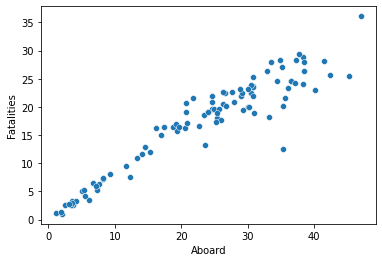

In [27]:
sns.scatterplot(data=pivoted1, x='Aboard', y='Fatalities')

There is linear relationship between Fatalities and Aboard passangers. This means that, increase in passengers aboard leads to increase in fatalities in case there is a crash which is logical even in real life.

In [28]:
pivote_type = pd.pivot_table(data=cleaned_df, index='Type', values='Fatalities')

In [29]:
pivote_type

,Fatalities
Type,
AAC-1 Toucan,23.0
AEGK,5.0
AT L98 Carvair,4.0
ATR 42-300,2.0
ATR-42-300,46.0
...,...
de Havilland Dove 1,11.0
de Havilland Dragon 1,3.0
de Havilland RU-6A Beaver /Bell UH-1H,18.0


***Finding Fatalities Maximum and Minimum value***

In [30]:
cleaned_df[cleaned_df['Fatalities'] == cleaned_df['Fatalities'].max()]

,id,Type,Aboard,Fatalities,Ground,Location,Operator,Year
2963,2964,Boeing B-747-121 / Boeing B-747-206B,644,583,0,"Tenerife, Canary Islands",Pan American World Airways / KLM,1977


In [31]:
pivote_type[pivote_type['Fatalities'] == pivote_type['Fatalities'].max()]

,Fatalities
Type,
Boeing B-747-121 / Boeing B-747-206B,583.0


**VISUALIZATION**

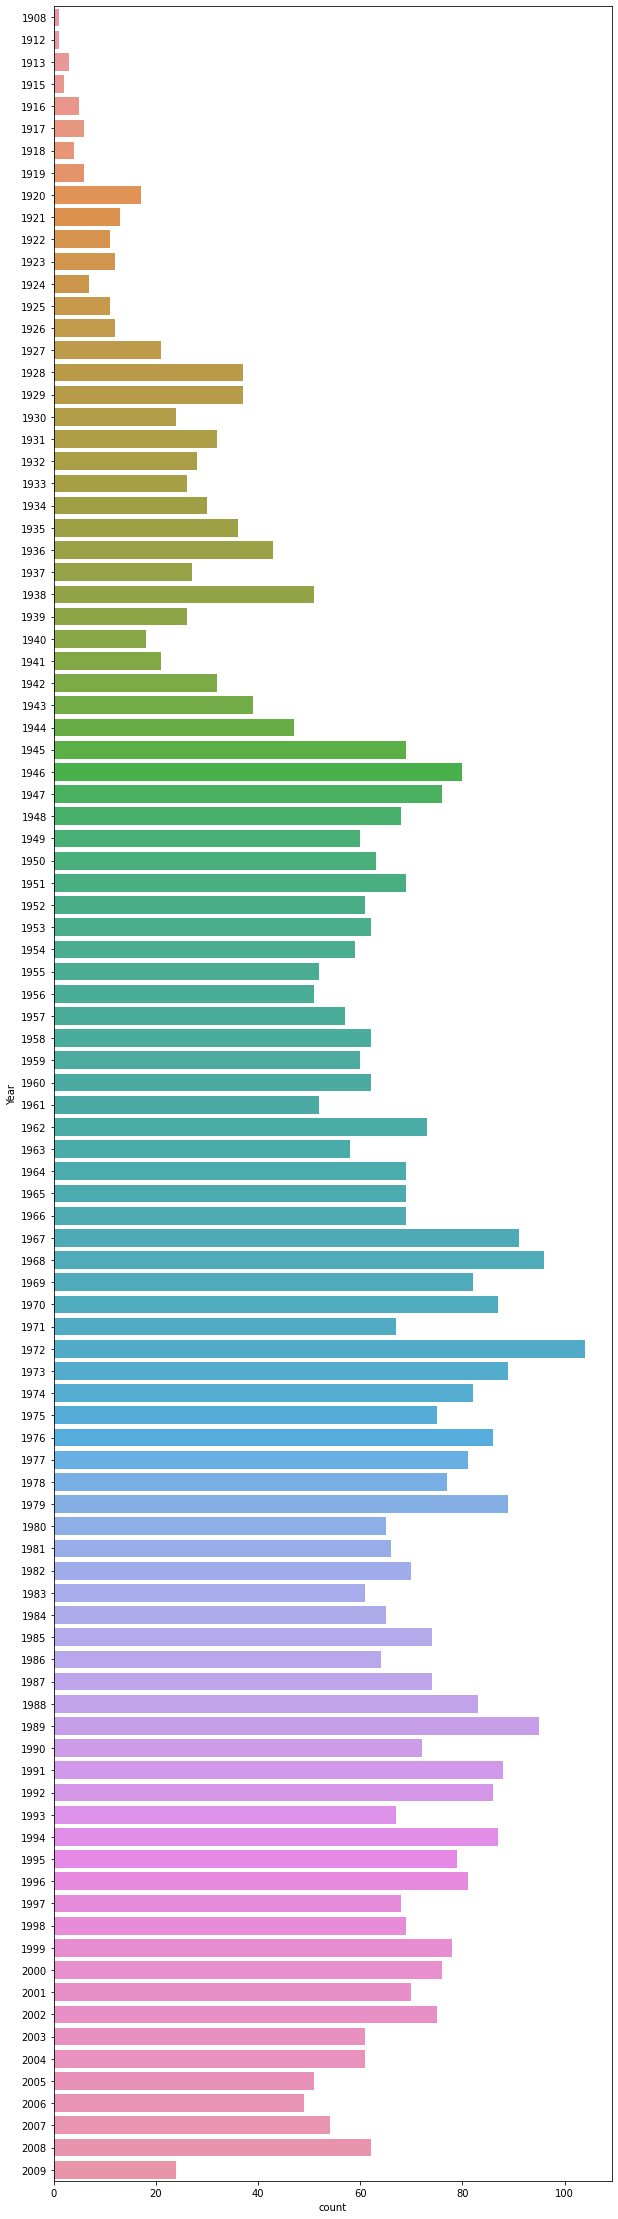

In [32]:
plt.figure(figsize=(10, 40))
sns.countplot(data=cleaned_df, y='Year')

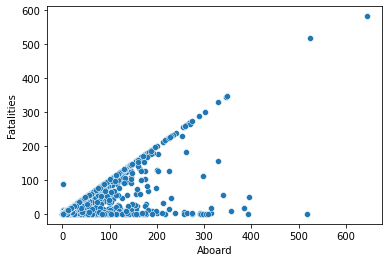

In [33]:
sns.scatterplot(data=cleaned_df, x='Aboard', y='Fatalities')

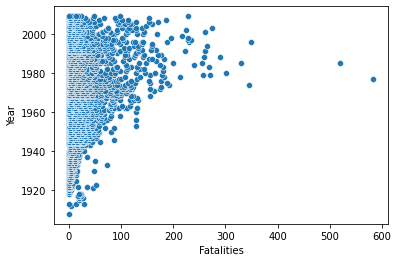

In [34]:
sns.scatterplot(data=cleaned_df, y='Year', x='Fatalities')

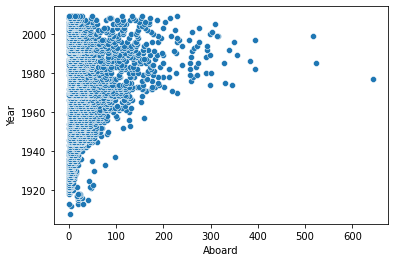

In [35]:
sns.scatterplot(data=cleaned_df, y='Year', x='Aboard')

***SUMMARY***

The above visualizatiuon shows that the Aboard passengers and fatalities increase as years go to the future. Boeing B-747-121 / Boeing B-747-206B aeroplane registered the highest number of fatalities since 1908 and was higher fatalities in 1977 with 583.